# Other Cellular Automata: Langton's ant and Elementary CA (16 points)

In [1]:
import numpy as np
import itertools
import pygame

from pygame.locals import (
    K_UP,
    K_DOWN,
    K_LEFT,
    K_RIGHT,
    K_ESCAPE,
    KEYDOWN,
    QUIT,
)

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Langton's ant

Langton's ant is a system with very simple rules, but complex behaviour. It can be described as a CA with a two-dimensional grid of binary cells. 

* Cells can be either *black* (**1**) or *white* (**0**). 
* The initial grid contains only white cells and an arbitrarily located 'ant'. 
* The 'ant' is a special cell that travels across the grid.
* The 'ant' can move a cell ahead in one of four directions. The direction is determined according to the following rules:
    * At a white cell (**0**) 'ant' turns <span style="color:green">90 degree clockwise</span>, flips the colour of the current cell and moves one cell ahead.
    * At a black cell (**1**) 'ant' turns <span style="color:red">90 degrees counterclokwise</span>, flips the colour of the current cell and moves one cell ahead.
![image](https://upload.wikimedia.org/wikipedia/commons/0/09/LangtonsAntAnimated.gif)
Sources and more: [1](https://mathworld.wolfram.com/LangtonsAnt.html), [2](https://en.wikipedia.org/wiki/Langton%27s_ant), [3](https://upload.wikimedia.org/wikipedia/commons/0/09/LangtonsAntAnimated.gif).

## Langton's ant in Python (8 points)

* (4 points) Fill the missing parts of the `move` & `update` functions.
* (2 points) Find and download a free ant image, load it in the code. Modify the `turnClockwise` and `turnCounterClokwise` functions, so that the ant image is rotated according to the CA's rules.
* (2 point) Move the ant automatically every few ms (add a timer).
Please note that the point (0,0) is located in the left upper corner of the board.

In [2]:
class Ant:
    def __init__(self, x, y, direction):
        # x,y: inital ant position
        # Directions: 0 - north, 1 - east, 2 - south, 3 - west
        self.x = x
        self.y = y
        self.direction = direction
        self.antImage = pygame.image.load('ant.png')
        
    def turnClockwise(self):
        self.direction += 1
        self.direction %= 4
        self.antImage = pygame.transform.rotate(self.antImage, -90)

    def turnCounterClockwise(self):
        self.direction -= 1
        self.direction %= 4
        self.antImage = pygame.transform.rotate(self.antImage, +90)
    
    def move(self):
        if self.direction in [0,2]:
            self.y += self.direction - 1
        else:
            self.x -= self.direction - 2
    
    def getAntImage(self):
        return self.antImage
    

In [3]:
class Grid:
    def __init__(self, size, ant):
        self.size = size
        self.grid = np.zeros((size,size))
        self.ant = ant
        
    def update(self):
        position = (self.ant.x, self.ant.y)
        if self.grid[position] == 1:
            self.ant.turnCounterClockwise()
        else:
            self.ant.turnClockwise()
        self.grid[position] = int(not bool(self.grid[position]))
        self.ant.move()

In [4]:
def drawGrid(screen, grid, w_width, w_height):
    black = (0,0,0)
    white = (255,255,255)
    ant_colour = (128,128,128)
    
    size = grid.size
    blockSize = (min(w_width, w_height) - size) / size
    
    for x in range(0, size):
        for y in range(0, size):
            pos_x = (blockSize+1) * x
            pos_y = (blockSize+1) * y
            rect = pygame.Rect(pos_x, pos_y, blockSize, blockSize)
            # Draw cells
            if grid.grid[x][y] == 1:
                pygame.draw.rect(screen, black, rect, 0)
            else:
                pygame.draw.rect(screen, white, rect, 0)    
    
            
            if grid.ant.x == x and grid.ant.y == y:
                # Draw ant
                ant_x = (blockSize+1) * grid.ant.x
                ant_y = (blockSize+1) * grid.ant.y
                ant_img = grid.ant.getAntImage()
                ant_img = pygame.transform.scale(ant_img, (blockSize, blockSize))
                screen.blit(ant_img, rect)
    pygame.display.flip()



In [5]:
pygame.init()
font = pygame.font.Font(None, 36)

# Parameters
w_width = 1000
w_height = 800
gridSize = 40

# Set up the drawing window, adjust the size
screen = pygame.display.set_mode([w_width, w_height])

# Create ant & grid
ant = Ant(int(gridSize / 2), int(gridSize / 2), 0)
grid = Grid(gridSize, ant)

# Set background
screen.fill((128, 128, 128))

drawGrid(screen, grid, w_width, w_height)

running = True
clock = pygame.time.Clock()
start_time = pygame.time.get_ticks()
last_update_time = pygame.time.get_ticks()

while running:
    # Event handling
    for event in pygame.event.get():
        if event.type == QUIT:
            running = False

        if event.type == KEYDOWN:
            if event.key == K_RIGHT:
                grid.update()
                drawGrid(screen, grid, w_width, w_height)

    current_time = pygame.time.get_ticks()
    if current_time - last_update_time >= 100:
        grid.update()
        drawGrid(screen, grid, w_width, w_height)
        last_update_time = current_time

    # Display the timer
    timer_text = font.render(f"Time: {(current_time - start_time) / 1000:.2f} s", True, (0, 0, 0), (255, 255, 255))
    screen.blit(timer_text, (810, 10))

    clock.tick(60)

pygame.quit()

# Elementary Cellular Automaton (8 points)

Let's consider a very simple CA with a one-dimensional array of binary values. Let's assume that a cell has only two neighbours (i.e. the cell on the left and the cell on the right). In that case there are only 8 ($2^3$) possible  combinations of any three consecutive cells states. As a consequence the rules for this automaton are often presented in the following form (the first row describes currently processed cell and its neighbours, the second shows the new value):
![image](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA30Rules_750.gif)

(source: [Wolfram Math World](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)).

E.g. The first rule says that if the cell and both its neighbours are black, then the new value will also be black.

In this system only $2^8$ possible sets of rules exist. The rule shown above is called *Rule 30* because the order of 1s and 0s resembles a binary number $00011110_2$, which in the decimal system is equal to 30.

The evolution of elementary cellular automata is often presented in a row-by-row manner:
![image](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA30_1000.gif)

(source: [Wolfram Math World](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)).




## Elementary Cellular Automaton in Python
* (3 poinst) Implement the *Rule 30* elementary cellular automaton.
* (4 points) Create a rule-independent implementation (rule is passed as a string in `__init__`; 2 points). Use binary operators (2 points)
* (1 point)  Check  patterns for rules: 60, 62, 182, 250


In [6]:
rule = np.array([int(bit) for bit in f'{30:08b}'])
print(rule)

[0 0 0 1 1 1 1 0]


In [7]:
class ElementaryCA:
    def __init__(self, length, rule):
        self.length = length
        self.rule = np.array([int(bit) for bit in f'{rule:08b}'])
        self.state = np.zeros((length), dtype = int)
        self.state[int(length/2)] = 1
        self.rowNumber = 0
        
    def nextRow(self):
            nextRow = np.zeros(self.length, dtype = int)
            #Boundary conditions; we're omitting the first and the last element
            for i in range(1,self.length-1):
                nextRow[i] = self.nextValue(self.state[i-1], self.state[i], self.state[i+1])
            self.state = nextRow
            self.rowNumber += 1

    def convert_to_binaty(self, n1, n2, n3):
        assert n1 in [0, 1] and n2 in [0, 1] and n3 in [0, 1]
        # example: 
        #       n1=1 -> n1<<2 -> 100 
        #       n2=0 -> n2<<1 -> 000 
        #       n3=1 -> n3    -> 001 
        #                        OR
        #                result: 101   (=6, and 6 is on index 1 (7-6) in rule array, based on above info)
        return (n1 << 2) | (n2 << 1) | n3  
            
    def nextValue(self, prev, mid, nxt):
        # TODO Your implementation, RETURNS a new value based on 3 cells 
        return self.rule[7 - self.convert_to_binaty(prev, mid, nxt)]

In [8]:
def drawAndUpdate(screen, ca, w_width, w_height):
    black = (0,0,0)
    white = (255,255,255)    
    length = ca.length
    blockSize = (min(w_width, w_height) - length) / length
    
    for x in range(0, length):
        pos_x = (blockSize+1) * x
        pos_y = (blockSize+1) * ca.rowNumber
        rect = pygame.Rect(pos_x, pos_y, blockSize, blockSize)
        # Draw cells
        if ca.state[x] == 1:
            pygame.draw.rect(screen, black, rect, 0)
        else:
            pygame.draw.rect(screen, white, rect, 0)    

    pygame.display.flip()
    ca.nextRow()

In [9]:
pygame.init()
# Parameters
w_width = 800
w_height = 800
# Set up the drawing window, adjust the size
screen = pygame.display.set_mode([w_width, w_height])

# Create ant & grid
ca = ElementaryCA(40, 30)

# Set background
screen.fill((128, 128, 128))

drawAndUpdate(screen, ca, w_width, w_height)
    
running = True

while running:
    for event in pygame.event.get():   
        if event.type == QUIT:
            running = False
        
        if event.type == KEYDOWN:
            if event.key == K_RIGHT:
                drawAndUpdate(screen, ca, w_width, w_height)
        
pygame.quit()

#### check pattern for 60, 62, 182, 250

In [10]:
rules = [30, 60, 62, 182, 250]

In [11]:
import os

for rule in rules:
    pygame.init()
    screen = pygame.display.set_mode([800, 800])
    
    length = 40
    ca = ElementaryCA(length, rule)
    screen.fill((128, 128, 128))
    drawAndUpdate(screen, ca, w_width, w_height)

    if not os.path.exists('data'):
        os.makedirs('data')
    
    for _ in range(length):
        drawAndUpdate(screen, ca, w_width, w_height)
        pygame.time.delay(10)

    pygame.image.save(screen, f"data/rule_{rule}.png")
    pygame.quit()

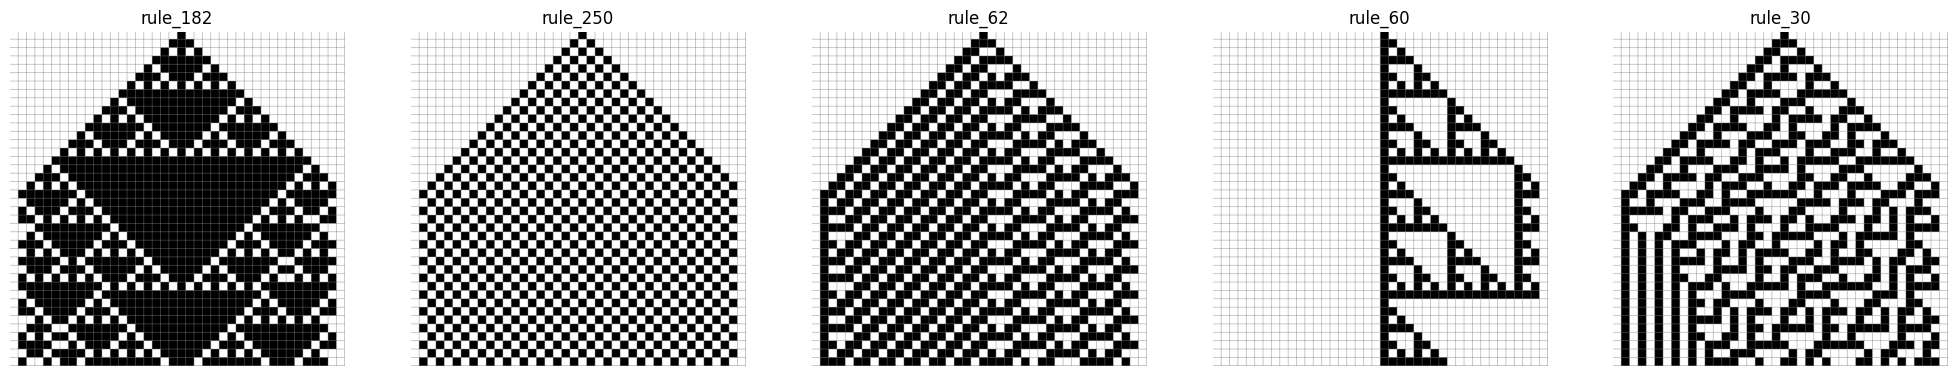

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = [f for f in os.listdir('data') if f.endswith('.png')]

fig, axes = plt.subplots(1, len(image_files), figsize=(25, 5))

for i, img_file in enumerate(image_files):
    img_path = os.path.join('data', img_file)
    
    axes[i].imshow(mpimg.imread(img_path))
    axes[i].axis('off')
    axes[i].set_title(img_file[:-4])

plt.show()